<a href="https://colab.research.google.com/github/neuralresearch/CS39-6/blob/henry/TaGSim_Graph_Pair_Generator_(LINUX).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#get the data from the drive https://drive.google.com/file/d/1yodobqsy6a8Kh-IiinxNEkHmAj_v7rMm/view?usp=share_link
id = '1yodobqsy6a8Kh-IiinxNEkHmAj_v7rMm'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('LINUXFull')
!ls


LINUXFull  sample_data


In [ ]:
from random import random
import matplotlib.pyplot as plt
import networkx as nx
import os
# Prints random item
print(random())

dirNameNew='LINUX/'
dirNameTrainNew='LINUX/train/'
dirNameTestNew='LINUX/test/'
try: 
  os.mkdir(dirNameNew) 
except OSError as error: 
  r=1
try: 
  os.mkdir(dirNameTrainNew) 
except OSError as error: 
  r=1
try: 
  os.mkdir(dirNameTestNew) 
except OSError as error: 
  r=1

testFileCount=0
trainFileCount=0

with open('LINUXFull') as f:
  anyG=False
  for line in f.readlines():
    nodeList=[]
    edgeList=[()]

    nodeCount=0
    if 't # ' == line[0:4]:
      if anyG:
        if testFileCount<200 and random()<0.1:
          nx.write_gexf(G , dirNameTestNew+ID.rjust(5, '0')+'.gexf' )
          testFileCount=testFileCount+1
        else:
          nx.write_gexf(G , dirNameTrainNew+ID.rjust(5, '0')+'.gexf' )
          trainFileCount=trainFileCount+1
      if trainFileCount>2000:
        break
      Gline=line.split()
      ID=Gline[2]
      G = nx.Graph()
      anyG=True
      #break 
    if 'v ' == line[0:2]:
      node=line.split()
      nodeID=node[1]
      G.add_node(nodeID)
    if 'e ' == line[0:2]:
      edge=line.split()
      eNode1=edge[1]
      eNode2=edge[2]
      G.add_edge(eNode1, eNode2)


import shutil
shutil.make_archive(dirNameNew, 'zip', dirNameNew)

0.7648713945676628


'/content/LINUX.zip'

In [ ]:
ID.rjust(5, '0')

'00000'

In [ ]:
ID

'0'

In [ ]:
random()

0.415882212848265

##Data Preparation

###Data Loading and observation

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#get the data from the drive
id = '1RRhSLOuRe0RCtBu-nzX32Bkaa23SYEFQ'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('LINUX.zip')
!ls

LINUX.zip  sample_data


In [ ]:
#if AIDS700nef exist do not run this part
#removing the dialog
%%capture
#unzip the file
!unzip LINUX.zip

In [ ]:
#visualise the first network data: 1011.gexf
import networkx as nx
import matplotlib.pyplot as plt
import random

#read the 1011.gexf
Graph = nx.read_gexf('LINUX/train/00001.gexf',version='1.2draft')


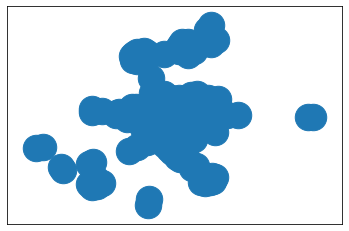

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

G=Graph
def draw_graph(G):
  pos=nx.spring_layout(G ,seed=42,scale=2)
  edgelist=G.edges
  edge_labels = nx.get_edge_attributes(G, "valence")
  node_labels = nx.get_node_attributes(G, "type")

  nx.draw_networkx_nodes(G, pos, node_size=700)
  nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=6)
  nx.draw_networkx_labels(G, pos,labels=node_labels, font_size=20, font_family="sans-serif")
  nx.draw_networkx_edge_labels(G, pos, edge_labels)
def draw_graph_id(G):
  pos=nx.spring_layout(G ,seed=42,scale=2)
  edgelist=G.edges
  edge_labels = nx.get_edge_attributes(G, "valence")

  nx.draw_networkx_nodes(G, pos, node_size=700)
  nx.draw_networkx_edges(G, pos, edgelist=edgelist, width=6)
  nx.draw_networkx_labels(G, pos,  font_size=20, font_family="sans-serif")
  nx.draw_networkx_edge_labels(G, pos, edge_labels)

G=Graph
def assignNodeLabel(G):
  nodeLabels=['a']
  relabelDict={}
  for nodeToBeRebel in G.nodes:
    relabelDict[nodeToBeRebel]={}
    newLabel=random.choice(list(nodeLabels))
    relabelDict[nodeToBeRebel]['type']=newLabel
  nx.set_node_attributes(G, relabelDict)
  return G


def assignEdgeLabel(G):
  edgeLabels=['1']
  relabelDict={}
  for edgeToBeRebel in G.edges:
    relabelDict[edgeToBeRebel]={}
    newLabel=random.choice(list(edgeLabels))
    relabelDict[edgeToBeRebel]['valence']=newLabel
  nx.set_edge_attributes(G, relabelDict)
  return G



draw_graph(G)

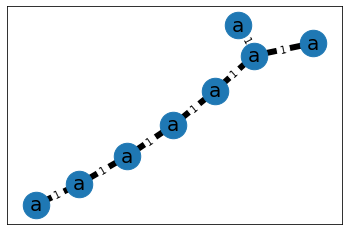

In [ ]:
draw_graph(G)

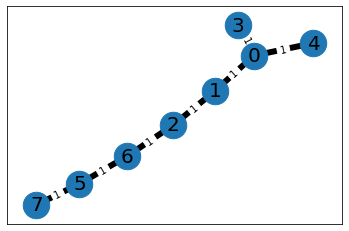

In [ ]:
draw_graph_id(G)

### Graph Pair Generator

In [ ]:


def graphPairGenerator(Graph,targetGEV):
  NR=targetGEV['NR']
  NID=targetGEV['NID']
  ER=targetGEV['ER']
  EID=targetGEV['EID']
  
  GEVsum=NR+NID+ER+EID

  def assignNodeLabel(G):
    nodeLabels=['a' ]
    relabelDict={}
    for nodeToBeRebel in G.nodes:
      relabelDict[nodeToBeRebel]={}
      newLabel=random.choice(list(nodeLabels))
      relabelDict[nodeToBeRebel]['type']=newLabel
    nx.set_node_attributes(G, relabelDict)
    return G


  def assignEdgeLabel(G):
    edgeLabels=['1' ]
    relabelDict={}
    for edgeToBeRebel in G.edges:
      relabelDict[edgeToBeRebel]={}
      newLabel=random.choice(list(edgeLabels))
      relabelDict[edgeToBeRebel]['valence']=newLabel
    nx.set_edge_attributes(G, relabelDict)
    return G
  
  nodeLabels=set(nx.get_node_attributes(Graph, "type").values())

  edgeLabels=set(nx.get_edge_attributes(Graph, "valence").values())

  nodeList= list(Graph.nodes)
  edgeList= list(Graph.edges)

  # set limit of relabeling
  NodeDataView=Graph.nodes.data()
  if NR>len(nodeList):
    NR=len(nodeList)
  EdgeView=Graph.edges 
  if ER>len(edgeList):
    ER=len(edgeList)




  newGraph=Graph.copy()

  nodeLabels=set(nx.get_node_attributes(newGraph, "type").values())
  #if len(nodeLabels)==1:
  #  nodeLabels.add('C')
  #  nodeLabels.add('S')


  edgeLabels=set(nx.get_edge_attributes(newGraph, "valence").values())
  #if len(edgeLabels)==1:
  #  edgeLabels.add('1')
  #  edgeLabels.add('2')
  retryLimit=100
  def NodeRelabel(newGraph,NR):
    relabedNode=[]
    
    relabelDict={}

    if len(list(newGraph.nodes))==0:
      return newGraph,0

    for i in range(NR):
      nodeToBeRebel=random.choice(list(newGraph.nodes))
      retry=0
      while(nodeToBeRebel in relabedNode ):
        nodeToBeRebel=random.choice(list(newGraph.nodes))
        retry=retry+1
        if (retry>retryLimit):
          return  newGraph,i
      relabedNode.append(nodeToBeRebel)

      relabelDict[nodeToBeRebel]={}
      newLabel=random.choice(list(nodeLabels))
      retry=0
      while(newLabel ==NodeDataView[nodeToBeRebel]["type"] ):
        newLabel=random.choice(list(nodeLabels))
        retry=retry+1
        if (retry>retryLimit):
          return  newGraph,i
      relabelDict[nodeToBeRebel]['type']=newLabel
    nx.set_node_attributes(newGraph, relabelDict)
    #print('Relabel node list:',relabelDict)
    return newGraph,NR

  def NodeInserted(newGraph,NID):
    newNode=[]
    for i in range(NID):
      newGraph.add_node(i+len(nodeList))
      newNode.append(i+len(nodeList))
    #print(newNode)
    return newGraph,NID

  def EdgeDelete(newGraph,EID):
    toDel=0
    if EID>0:
      toDel=random.choice(list(range(EID)))
    if EID>len(list(newGraph.edges)):
      toDel=len(list(newGraph.edges))
    deletedEdge=[]
    for i in range(toDel):
      e=random.choice(list(newGraph.edges))
      newGraph.remove_edge(*e)
      deletedEdge.append(e)
    #print('Delete edge:',deletedEdge)
    return newGraph,deletedEdge,toDel

  def EdgeRelabel(newGraph,ER):
    relabedEdge=[]
    

    relabelDict={}
    if len(list(newGraph.edges))==0:
      return newGraph,0

    for i in range(ER):
      edgeToBeRebel=random.choice(list(newGraph.edges))
      retry=0
      while(edgeToBeRebel in relabedEdge ):
        edgeToBeRebel=random.choice(list(newGraph.edges))
        retry=retry+1
        if (retry>retryLimit):
          return  newGraph,i
      relabedEdge.append(edgeToBeRebel)

      relabelDict[edgeToBeRebel]={}
      newLabel=random.choice(list(edgeLabels)) 
      retry=0
      while(newLabel ==nx.get_edge_attributes(newGraph,'valence')[edgeToBeRebel] ):
        newLabel=random.choice(list(edgeLabels))
        retry=retry+1
        if (retry>retryLimit):
          return  newGraph,i
      relabelDict[edgeToBeRebel]['valence']=newLabel
    nx.set_edge_attributes(newGraph, relabelDict)
    #print('Relable edge:',relabelDict)
    return newGraph,ER

  def EdgeInsert(newGraph,EID,toDel,deletedEdge): 
    newEdges=[]
    toInsert=EID-toDel
    for i in range(toInsert):

      n1,n2=random.choice(list(newGraph.nodes)),random.choice(list(newGraph.nodes))

      
      retry=0
      #random select 2 node agian if edge has already existed/the edge is deleted in delete rpocess
      while(n1==n2 or (n1,n2) in list(Graph.edges) or (n2,n1) in list(Graph.edges)or (n1,n2) in deletedEdge or (n2,n1) in deletedEdge):
        n1,n2=random.choice(list(newGraph.nodes)),random.choice(list(newGraph.nodes))
        retry=retry+1
        if (retry>retryLimit):
          return  newGraph,i
      newGraph.add_edge(n1,n2)
      newEdges.append((n1,n2))
    #print('Add edge:',newEdges)
    return newGraph 

  newGraph,NR = NodeRelabel(newGraph,NR)
  newGraph,NID = NodeInserted(newGraph,NID)
  newGraph,deletedEdge,toDel = EdgeDelete(newGraph,EID) 
  newGraph,ER = EdgeRelabel(newGraph,ER) 
  newGraph = EdgeInsert(newGraph,EID,toDel,deletedEdge) 

  #make the sum of operation fill the target
  moreNID=GEVsum-(NR+NID+ER+EID)
  if moreNID>0:
    newGraph,moreNID = NodeInserted(newGraph,moreNID)
    NID=NID+moreNID
  finalGEV={'NR':NR,'NID':NID,'ER':ER,'EID':EID}
  return Graph,newGraph,finalGEV

In [ ]:

import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import random
import pandas as pd
def constrained_sum_sample_pos(n, total):
    """Return a randomly chosen list of n positive integers summing to total.
    Each such list is equally likely to occur."""

    dividers = sorted(random.sample(range(1, total), n - 1))
    return [a - b for a, b in zip(dividers + [total], [0] + dividers)]



In [ ]:

maxNodeLabelList=[]
maxEdgeLabelList=[]

dirNameTrain = 'LINUX/train/'
dirNameTest = 'LINUX/test/'
dirNameTrainNew = 'LINUXNew/train/'
dirNameTestNew = 'LINUXNew/test/'
try: 
  os.mkdir('LINUXNew') 
except OSError as error: 
  r=1
try: 
  os.mkdir(dirNameTrainNew) 
except OSError as error: 
  r=1
try: 
  os.mkdir(dirNameTestNew) 
except OSError as error: 
  r=1
trainSet=[]
testSet=[]
dirName=dirNameTrain
dirNameNew=dirNameTrainNew
filenames = os.listdir(dirName)
df = pd.DataFrame(columns = ["G1", "G2", "GED","gt_ged" ])
j=0
for file in filenames:
  if not file.split('.')[1] =='gexf':
    continue
  Graph = nx.read_gexf(dirName+file,version='1.2draft')
  
  #GEVtargetsum=random.randrange(4,16)
  #GEVList=constrained_sum_sample_pos(4,GEVtargetsum)
  #targetGEV={'NR':GEVList[0],'NID':GEVList[1],'ER':GEVList[2],'EID':GEVList[3]}
  GEVtargetsum=8
  GEVList=constrained_sum_sample_pos(2,GEVtargetsum)
  targetGEV={'NR':0,'NID':GEVList[0],'ER':0,'EID':GEVList[1]}
  (Graph,newGraph,GEV)=graphPairGenerator(Graph,targetGEV)



  fileName=file.split('.')[0]+'_NR_'+str(GEV['NR'])+'_NID_'+str(GEV['NID'])+'_ER_'+str(GEV['ER'])+'_EID_'+str(GEV['EID'])+'.'+file.split('.')[1]
  nx.write_gexf(newGraph ,dirNameNew+ fileName )
  new_row = pd.Series({"G1":file, "G2":fileName,"GED":[0,GEVList[0],0,GEVList[1]], "gt_ged":GEV['NR']+GEV['NID']+GEV['ER']+GEV['EID']})
  df.loc[j] = new_row
  j=j+1
df.to_csv(dirNameNew+'Data.csv',index = False) 
print(dirNameNew+'Data.csv')



dirName=dirNameTest
dirNameNew=dirNameTestNew
filenames = os.listdir(dirName)
df = pd.DataFrame(columns = ["G1", "G2", "GED","gt_ged" ])
j=0
for file in filenames:
  if not file.split('.')[1] =='gexf':
    continue
  Graph = nx.read_gexf(dirName+file,version='1.2draft')
  #GEVtargetsum=random.randrange(4,16)
  #GEVList=constrained_sum_sample_pos(4,GEVtargetsum)
  #targetGEV={'NR':GEVList[0],'NID':GEVList[1],'ER':GEVList[2],'EID':GEVList[3]}
  GEVtargetsum=8
  GEVList=constrained_sum_sample_pos(2,GEVtargetsum)
  targetGEV={'NR':0,'NID':GEVList[0],'ER':0,'EID':GEVList[1]}
  (Graph,newGraph,GEV)=graphPairGenerator(Graph,targetGEV)
  
#_NR_0_NID_5_ER_0_EID_3
  fileName=file.split('.')[0]+'_NR_'+str(GEV['NR'])+'_NID_'+str(GEV['NID'])+'_ER_'+str(GEV['ER'])+'_EID_'+str(GEV['EID'])+'.'+file.split('.')[1]
  nx.write_gexf(newGraph , dirNameNew+fileName )
  new_row = pd.Series({"G1":file, "G2":fileName,"GED":[0,GEVList[0],0,GEVList[1]], "gt_ged":GEV['NR']+GEV['NID']+GEV['ER']+GEV['EID']})
  df.loc[j] = new_row
  j=j+1
df.to_csv(dirNameNew+'Data.csv',index = False) 
print(dirNameNew+'Data.csv')


import shutil
shutil.make_archive('NEW_LINUX', 'zip', 'LINUXNew')

LINUXNew/train/Data.csv
LINUXNew/test/Data.csv


'/content/NEW_LINUX.zip'

In [ ]:
df

,oldGraph,newGraph,GEVSum,NR,NID,ER,EID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

import shutil
shutil.make_archive('NEW_LINUX', 'zip', 'LINUX')

In [ ]:
dirName='LINUX/train/'
file='00000.gexf'

Graph = nx.read_gexf(dirName+file,version='1.2draft')

#GEVtargetsum=random.randrange(4,16)
#GEVList=constrained_sum_sample_pos(4,GEVtargetsum)
#targetGEV={'NR':GEVList[0],'NID':GEVList[1],'ER':GEVList[2],'EID':GEVList[3]}
GEVtargetsum=8
GEVList=constrained_sum_sample_pos(2,GEVtargetsum)
targetGEV={'NR':0,'NID':GEVList[0],'ER':0,'EID':GEVList[1]}
(Graph,newGraph,GEV)=graphPairGenerator(Graph,targetGEV)
fileName=file.split('.')[0]+'_NR_'+str(GEV['NR'])+'_NID_'+str(GEV['NID'])+'_ER_'+str(GEV['ER'])+'_EID_'+str(GEV['EID'])+'.'+file.split('.')[1]
fileName

'00000_NR_0_NID_3_ER_0_EID_5.gexf'

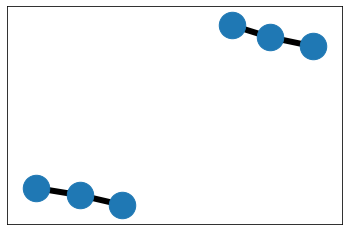

In [ ]:

draw_graph(Graph)

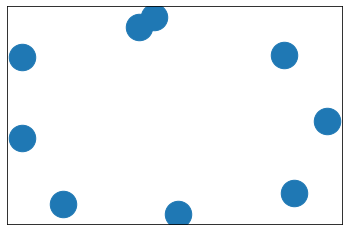

In [ ]:

draw_graph(newGraph)

In [ ]:

Graph = nx.read_gexf('LINUXNew/train/1002_new.gexf',version='1.2draft')
draw_graph(Graph)

In [ ]:

Graph = nx.read_gexf('LINUXNew/train/1002.gexf',version='1.2draft')
draw_graph(Graph)

In [ ]:


#get the data from the drive https://drive.google.com/file/d/13s96Ka0gMMaVaeRxoBUiBJ22QDu28xiS/view?usp=share_link
id = '13s96Ka0gMMaVaeRxoBUiBJ22QDu28xiS'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('LINUX.zip')
!ls

LINUX  LINUX.zip  sample_data


In [ ]:
#if train and test exist do not run this part
#removing the dialog
%%capture
#unzip the file
# updated_train
# updated_test
!unzip LINUX.zip

In [ ]:
# pick a pair graph
import os
import random
import matplotlib.pyplot as plt
import networkx as nx

import pandas as pd
dirName = 'test/' #updated_train
filenames = os.listdir(dirName)
test_df = pd.read_csv(dirName+'Data.csv', sep=',')
test_df = test_df.reset_index() 

test_df.iloc[0]

index                   0
oldGraph        4488.gexf
newGraph    4488_new.gexf
GEVSum                  8
NR                      0
NID                     2
ER                      0
EID                     6
Name: 0, dtype: object

In [ ]:
test_df[['networkX_DEG']]=0

In [ ]:
test_df

,G1,G2,GED,gt_ged
0,01650.gexf,01650_NR_0_NID_7_ER_0_EID_1.gexf,"[0, 7, 0, 1]",8
1,00029.gexf,00029_NR_0_NID_5_ER_0_EID_3.gexf,"[0, 5, 0, 3]",8
2,02052.gexf,02052_NR_0_NID_1_ER_0_EID_7.gexf,"[0, 1, 0, 7]",8
3,01095.gexf,01095_NR_0_NID_7_ER_0_EID_1.gexf,"[0, 7, 0, 1]",8
4,00672.gexf,00672_NR_0_NID_2_ER_0_EID_6.gexf,"[0, 2, 0, 6]",8
...,...,...,...,...
191,02022.gexf,02022_NR_0_NID_3_ER_0_EID_5.gexf,"[0, 3, 0, 5]",8
192,01328.gexf,01328_NR_0_NID_1_ER_0_EID_7.gexf,"[0, 1, 0, 7]",8
193,01603.gexf,01603_NR_0_NID_5_ER_0_EID_3.gexf,"[0, 5, 0, 3]",8
194,00904.gexf,00904_NR_0_NID_7_ER_0_EID_1.gexf,"[0, 7, 0, 1]",8


In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#get the data from the drive https://drive.google.com/file/d/1YiX2r2glQ4r1hiy7BqAkSRyGvuPqBcne/view?usp=share_link
id = '1YiX2r2glQ4r1hiy7BqAkSRyGvuPqBcne'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('LINUX.zip')
!ls


LINUXFull  LINUX.zip  sample_data


In [ ]:

!unzip /content/LINUX.zip

In [ ]:
import random
import signal

import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import random
import pandas as pd

def handler(signum, frame):
  print("Forever is over!")
  raise Exception("end of time")
testIndex=[]
df = pd.DataFrame(columns = ["G1", "G2", "gt_ged" ])
j=0
optIndex=[]
dirName='test/'
dirNameNew='test_gen/'
test_df=pd.read_csv('testing_pairs.csv')
for k in range(7):
  for i in range(10):
    index=random.randrange(len(test_df))
    pair_1=test_df.iloc[index]['G1']
    graph1 = nx.read_gexf(dirName+pair_1) #updated_train
    while len(list(graph1.nodes))>10:
      index=random.randrange(len(test_df))
      pair_1=test_df.iloc[index]['G1']
      graph1 = nx.read_gexf(dirName+pair_1) #updated_train


    index2=random.randrange(len(test_df))
    pair_2=test_df.iloc[index2]['G1']
    graph2 = nx.read_gexf(dirName+pair_2) #updated_train
    while len(list(graph2.nodes))>10:
      index2=random.randrange(len(test_df))
      pair_2=test_df.iloc[index2]['G1']
      graph2 = nx.read_gexf(dirName+pair_2) #updated_train
    try:
      signal.signal(signal.SIGALRM, handler)
      signal.alarm(600)
      paths, cost =nx.optimal_edit_paths(graph1,graph2)
      gev=cost
    except Exception : 
      print('timeout try another')
      print('-----------------------------------------')
      continue
    
    print(pair_1,'  ',pair_2,'  ',str(gev))
    print('-----------------------------------------')
    new_row = pd.Series({"G1":pair_1, "G2":pair_2, "gt_ged":gev })
    df.loc[j] = new_row
    j=j+1

  df.to_csv(str(k)+'OptData.csv',index = False) 
  print('export csv')

01096.gexf    00188.gexf    11.0
-----------------------------------------
00198.gexf    00710.gexf    0.0
-----------------------------------------
00732.gexf    00540.gexf    10.0
-----------------------------------------
00476.gexf    00975.gexf    4.0
-----------------------------------------
01096.gexf    01096.gexf    0.0
-----------------------------------------
00975.gexf    00073.gexf    4.0
-----------------------------------------
00338.gexf    01102.gexf    4.0
-----------------------------------------
01296.gexf    01772.gexf    4.0
-----------------------------------------
00619.gexf    00819.gexf    7.0
-----------------------------------------
01195.gexf    01121.gexf    4.0
-----------------------------------------
export csv
00476.gexf    02140.gexf    4.0
-----------------------------------------
02024.gexf    00104.gexf    8.0
-----------------------------------------
00449.gexf    01285.gexf    4.0
-----------------------------------------
00188.gexf    01133.gexf 

In [ ]:


df.to_csv('OptData.csv',index = False) 
print('OptData.csv')

OptData.csv


In [ ]:
signal.alarm(0)

In [ ]:
dirName='LINUX/test/'
import networkx as nx
graph1 = nx.read_gexf(dirName+'00010.gexf') #updated_train
graph2 = nx.read_gexf(dirNameNew+'00010_NR_0_NID_4_ER_0_EID_4.gexf') #updated_train
x=nx.optimize_graph_edit_distance(graph1,graph2)

for v in x:
  gev=v
print(gev)

KeyboardInterrupt: ignored

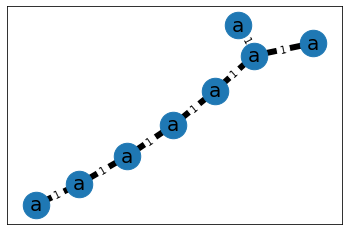

In [ ]:

draw_graph(graph1)

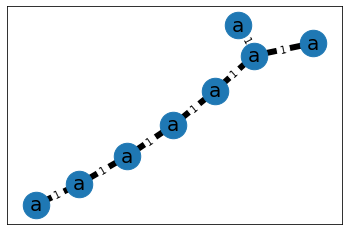

In [ ]:
dirName='train/'
graph2 = nx.read_gexf(dirName+'10124.gexf') #updated_train
draw_graph(graph2)

In [ ]:
test_df

,index,oldGraph,newGraph,GEVSum,NR,NID,ER,EID,networkX_DEG
0,0,4488.gexf,4488_new.gexf,8,0,2,0,6,0
1,1,29272.gexf,29272_new.gexf,8,0,7,0,1,0
2,2,382.gexf,382_new.gexf,8,0,1,0,7,5
3,3,21659.gexf,21659_new.gexf,8,0,3,0,5,0
4,4,24295.gexf,24295_new.gexf,8,0,4,0,4,0
...,...,...,...,...,...,...,...,...,...
195,195,28948.gexf,28948_new.gexf,8,0,5,0,3,0
196,196,27028.gexf,27028_new.gexf,8,0,5,0,3,8
197,197,43642.gexf,43642_new.gexf,8,0,5,0,3,8
198,198,39541.gexf,39541_new.gexf,8,0,2,0,6,0


FUCK


t # 0



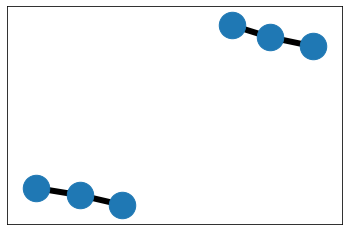

In [ ]:
with open('LINUXFull') as f:
  anyG=False
  for line in f.readlines():
    nodeList=[]
    edgeList=[()]

    nodeCount=0
    if 't # ' == line[0:4]:
      if anyG:
        break
      G = nx.Graph()
      print(line)
      anyG=True
      #break 
    if 'v ' == line[0:2]:
      node=line.split()
      nodeID=node[1]
      G.add_node(nodeID)
    if 'e ' == line[0:2]:
      edge=line.split()
      eNode1=edge[1]
      eNode2=edge[2]
      G.add_edge(eNode1, eNode2)

draw_graph(G)